In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools

RDKit WARNING: [20:12:34] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
import pyspark
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.Builder().appName('reinvent app').getOrCreate()

In [4]:
spk = spark.read.parquet('generated_molecules.parquet/')

In [5]:
df = spk.toPandas()

In [6]:
df.head(2)

,smiles,scaffold,decorations,count
0,C(=Nc1ccc2c(CN3CCN(c4cccc5ccccc45)CC3)ccnc2c1)...,c1c([*:0])cc2c(c1)c([*:1])ccn2,"{0: '[*]N=CN1CCOC1', 1: '[*]CN1CCN(c2cccc3cccc...",1
1,CC(=O)COc1ccc2c(CN3CCCN(c4ccc(Cl)cc4)C3)ccnc2c1,c1c([*:0])cc2c(c1)c([*:1])ccn2,"{0: '[*]OCC(C)=O', 1: '[*]CN1CCCN(c2ccc(Cl)cc2...",1


In [7]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles', molCol='smiles')
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='scaffold', molCol='scaffold')

,smiles,scaffold,decorations,count
0,,,"{0: '[*]N=CN1CCOC1', 1: '[*]CN1CCN(c2cccc3cccc...",1
1,,,"{0: '[*]OCC(C)=O', 1: '[*]CN1CCCN(c2ccc(Cl)cc2...",1
2,,,"{0: '[*]NC(C)c1ccccc1', 1: '[*]NC(C)=O'}",1
3,,,"{0: '[*]OCCN1CCN(c2ccc(Cl)cc2)CC1', 1: '[*]NC(...",3
4,,,"{0: '[*]COc1cccc(Cl)c1Cl', 1: '[*]COC(C)=O'}",1
5,,,"{0: '[*]COc1cccc(Cl)c1Cl', 1: '[*]C(O)C(C)O'}",5
6,,,"{0: '[*]F', 1: '[*]CN1CCC(C)CC1'}",3
7,,,"{0: '[*]C(=O)CCOC', 1: '[*]N(C)CC'}",1
8,,,"{0: '[*]C(=O)OCC', 1: '[*]CN1CCN(Cc2ccccc2)CC1'}",2
9,,,"{0: '[*]C(=O)OCC', 1: '[*]CN1CCN(c2ccc(N)cc2)C...",1

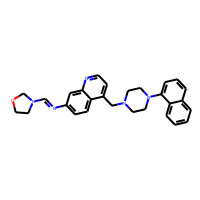
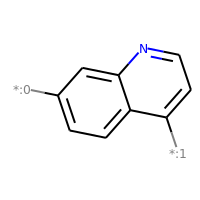
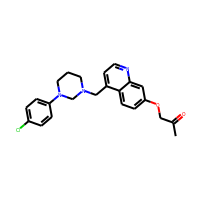
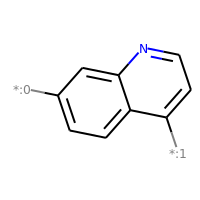
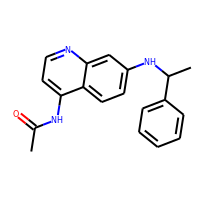
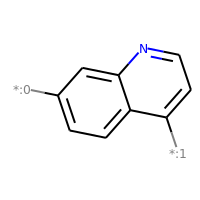
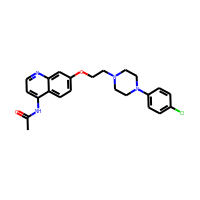
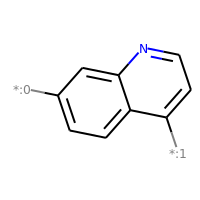
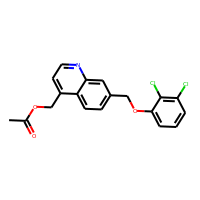
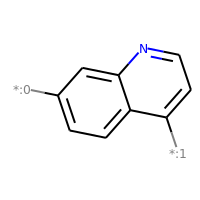
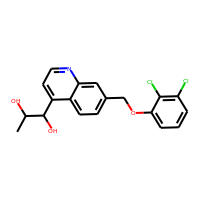
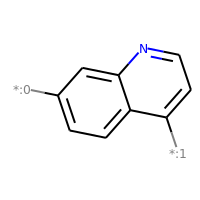
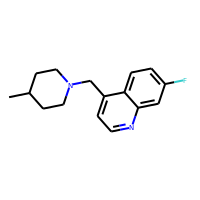
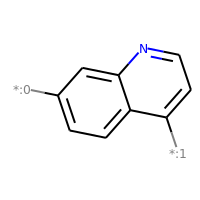
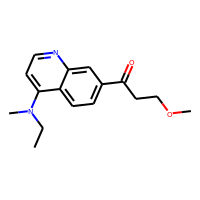
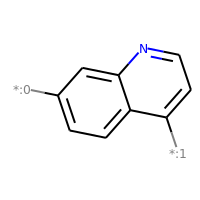
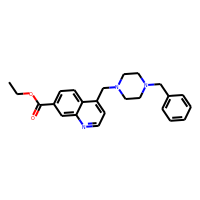
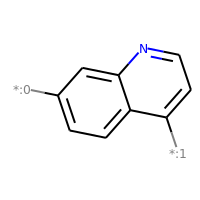
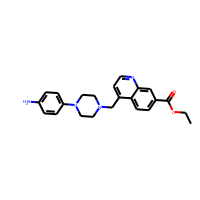
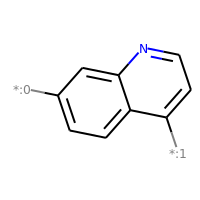

In [9]:
df.head(10)

In [10]:
mols = df.smiles.to_list()

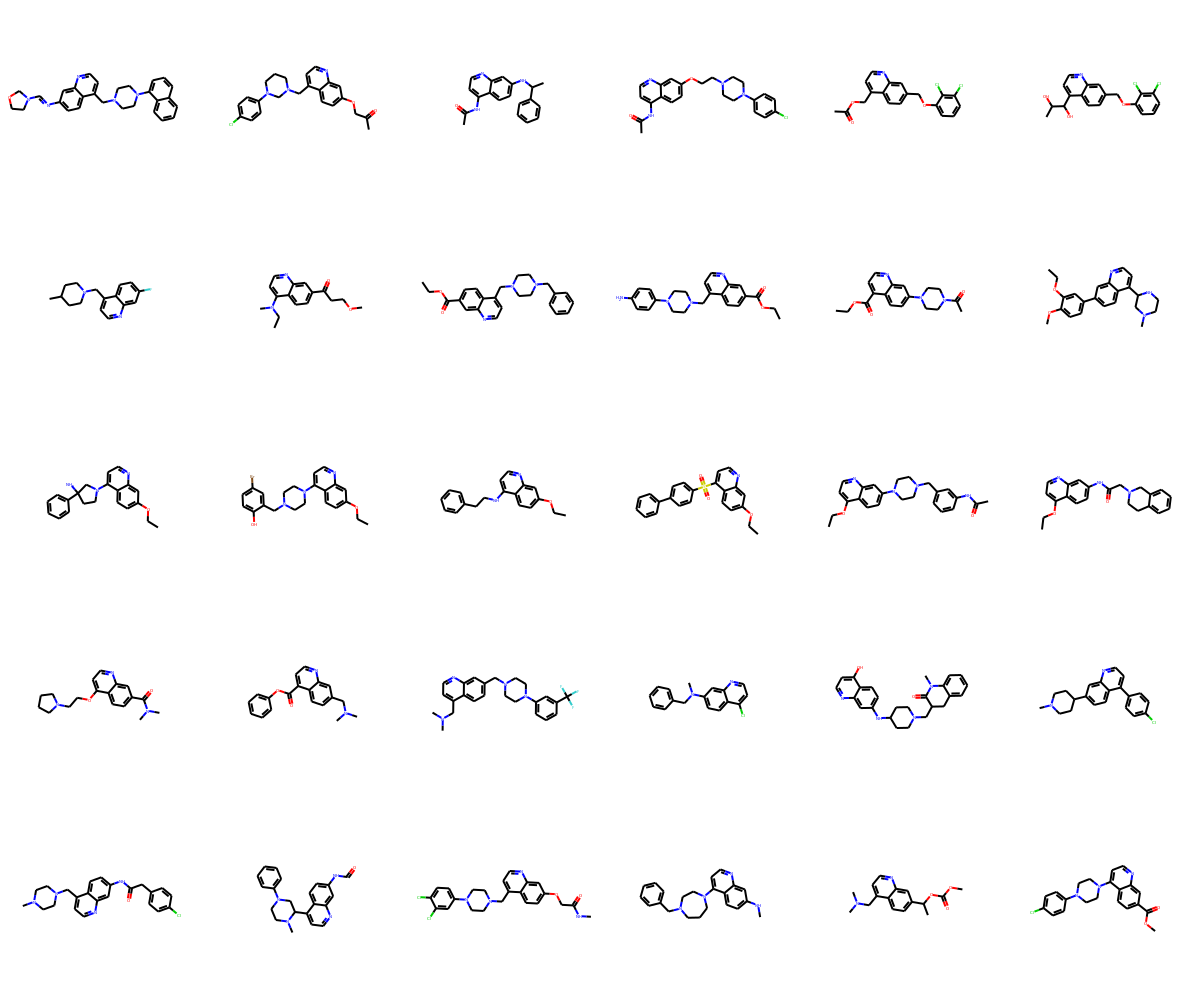

In [11]:
Draw.MolsToGridImage(mols[:30], molsPerRow=6)